In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


In [2]:
end = date.today()
start=date(year=1957,month=end.month, day=end.day)

In [3]:
import pandas as pd

# URL of the Wikipedia page
url = "http://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Read the tables on the page
tables = pd.read_html(url)

tables

[    Symbol             Security             GICS Sector  \
 0      MMM                   3M             Industrials   
 1      AOS          A. O. Smith             Industrials   
 2      ABT  Abbott Laboratories             Health Care   
 3     ABBV               AbbVie             Health Care   
 4      ACN            Accenture  Information Technology   
 ..     ...                  ...                     ...   
 498    XYL           Xylem Inc.             Industrials   
 499    YUM          Yum! Brands  Consumer Discretionary   
 500   ZBRA   Zebra Technologies  Information Technology   
 501    ZBH        Zimmer Biomet             Health Care   
 502    ZTS               Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care 

In [4]:
import pandas as pd

# Define the URL
url = "http://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Read tables from the page
tables = pd.read_html(url)

# Display the number of tables found
print(f"Number of tables found: {len(tables)}")

# Show the first table
SP=tables[0]

Number of tables found: 2


In [5]:
SP.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
# Convert date column to datetime
SP['Date added'] = pd.to_datetime(SP['Date added'])


In [7]:

# Count rows per year
year_counts = SP.groupby(SP['Date added'].dt.year).size()



In [8]:
# Sort values in descending order
year_counts = year_counts.sort_values(ascending=False)

print(year_counts)

Date added
1957    53
2017    23
2016    23
2019    22
2008    17
2024    16
2022    16
2023    15
2021    15
2018    14
2015    14
2012    14
1997    14
2002    13
2009    12
2007    12
2020    12
1976    11
1998    11
2013    10
2011    10
2006    10
2010     9
2000     9
1999     9
2014     8
2001     8
1994     7
2005     7
1995     7
1985     7
2004     6
1982     5
2003     5
2025     5
1984     5
1989     5
1988     4
1981     3
1993     3
1992     3
1980     3
1983     3
1986     3
1973     2
1969     2
1975     2
1987     2
1996     2
1970     2
1979     2
1965     2
1972     2
1964     1
1974     1
1991     1
1978     1
dtype: int64


In [9]:
# Define the cutoff date (20 years ago)
cutoff_date = pd.to_datetime("today") - pd.DateOffset(years=20)

# Filter stocks that were added more than 20 years ago
stocks_20_years = SP[SP['Date added'] <= cutoff_date]

# Count how many stocks meet the criteria
num_stocks = len(stocks_20_years)

print(f"Number of S&P 500 stocks in the index for more than 20 years: {num_stocks}")

Number of S&P 500 stocks in the index for more than 20 years: 219


In [10]:
import yfinance as yf

# Define the indices
indices = ['^GSPC', '000001.SS', '^HSI', '^AXJO', '^NSEI', '^GSPTSE', '^GDAXI', '^FTSE', '^N225', '^MXX', '^BVSP']

# Download data for each index
data = {index: yf.download(index, start='2025-01-01', end='2025-05-01') for index in indices}

# Calculate YTD returns
ytd_returns = {}
for index, df in data.items():
    if not df.empty and 'Close' in df.columns:  # Ensure data is not empty and 'Close' exists
        try:
            # Extract the first and last Close values
            start_price = df['Close'].iloc[0]
            end_price = df['Close'].iloc[-1]

            # Calculate YTD return
            ytd_return = float((end_price - start_price) / start_price * 100)  # Ensure float type
            ytd_returns[index] = ytd_return
        except Exception as e:
            print(f"Error processing index {index}: {e}")

# Compare to S&P 500
sp500_ytd = ytd_returns.get('^GSPC', None)
if sp500_ytd is not None:
    try:
        # Count indexes with better YTD returns
        better_than_sp500 = sum(return_ > sp500_ytd for return_ in ytd_returns.values())
        print(f"Indexes with better YTD returns than S&P 500: {better_than_sp500}")
    except Exception as e:
        print(f"Error in comparison: {e}")
else:
    print("S&P 500 data is not available.")

# Debug: Print YTD returns
for index, value in ytd_returns.items():
    print(f"Index: {index}, YTD Return: {value:.2f}%")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Indexes with better YTD returns than S&P 500: 9
Index: ^GSPC, YTD Return: -5.10%
Index: 000001.SS, YTD Return: 0.50%
Index: ^HSI, YTD Return: 12.72%
Index: ^AXJO, YTD Return: -0.91%
Index: ^NSEI, YTD Return: 2.49%
Index: ^GSPTSE, YTD Return: -0.23%
Index: ^GDAXI, YTD Return: 12.35%
Index: ^FTSE, YTD Return: 2.84%
Index: ^N225, YTD Return: -8.30%
Index: ^MXX, YTD Return: 13.05%
Index: ^BVSP, YTD Return: 12.44%



C:\Users\priya\AppData\Local\Temp\ipykernel_11512\10939820.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ytd_return = float((end_price - start_price) / start_price * 100)  # Ensure float type


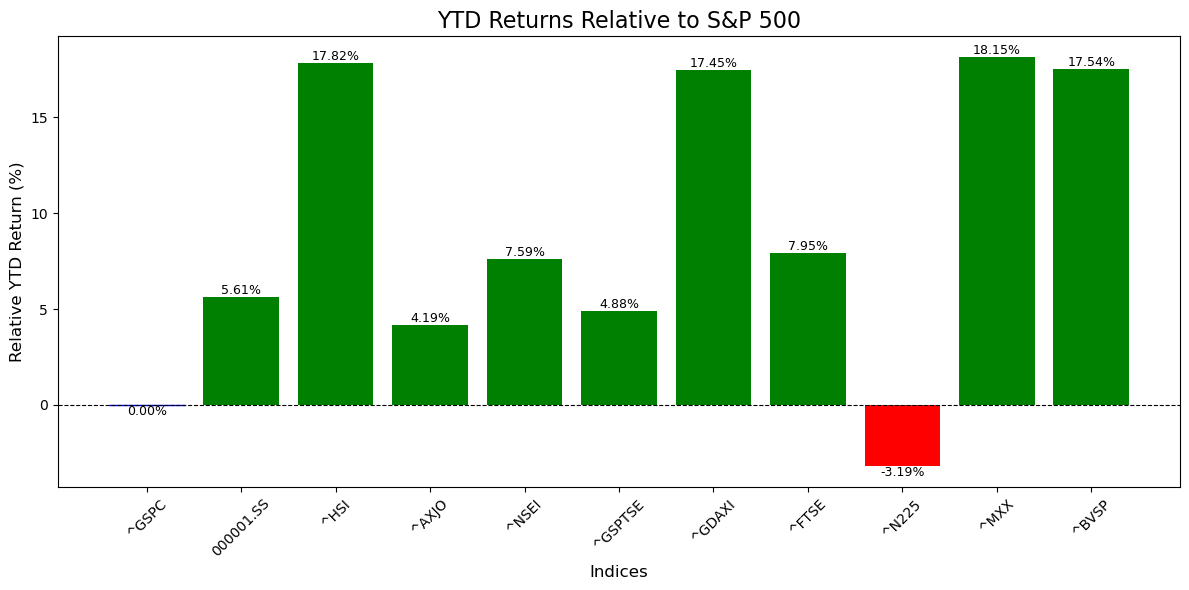

In [11]:
import matplotlib.pyplot as plt

# Extract S&P 500 YTD return
sp500_ytd = ytd_returns.get('^GSPC', None)

if sp500_ytd is not None:
    # Normalize returns relative to S&P 500
    relative_returns = {index: value - sp500_ytd for index, value in ytd_returns.items()}

    # Create the plot
    indices = list(relative_returns.keys())
    values = list(relative_returns.values())

    plt.figure(figsize=(12, 6))
    bars = plt.bar(indices, values, color=['green' if val > 0 else 'red' for val in values])
    
    # Highlight the S&P 500 bar
    for bar, index in zip(bars, indices):
        if index == '^GSPC':
            bar.set_color('blue')
    
    # Add annotations
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=9)

    # Add title and labels
    plt.title('YTD Returns Relative to S&P 500', fontsize=16)
    plt.xlabel('Indices', fontsize=12)
    plt.ylabel('Relative YTD Return (%)', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("S&P 500 data is not available to compare.")


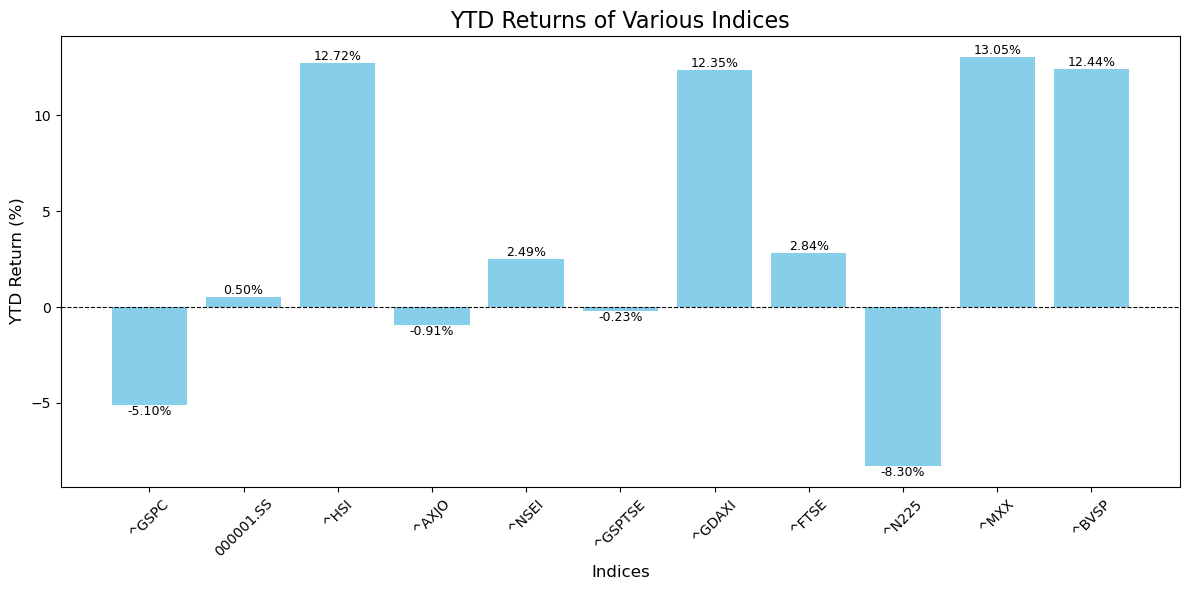

In [12]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
indices = list(ytd_returns.keys())
values = list(ytd_returns.values())

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(indices, values, color='skyblue')

# Add annotations for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=9)

# Add title and labels
plt.title('YTD Returns of Various Indices', fontsize=16)
plt.xlabel('Indices', fontsize=12)
plt.ylabel('YTD Return (%)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0%
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
import yfinance as yf
import pandas as pd

# Download S&P 500 data
sp500 = yf.download('^GSPC', start='1950-01-01', end='2025-05-27')

# Select the Close price column (handle MultiIndex)
close_prices = sp500[('Close', '^GSPC')]

# Identify all-time highs
all_time_high = close_prices.cummax()
is_all_time_high = close_prices == all_time_high
all_time_highs = sp500[is_all_time_high].copy()

# Find corrections between all-time highs
corrections = []
for i in range(len(all_time_highs) - 1):
    start_date = all_time_highs.index[i]
    end_date = all_time_highs.index[i+1]
    high_price = close_prices.loc[start_date]
    period_data = close_prices.loc[start_date:end_date]
    min_price = period_data.min()
    min_date = period_data.idxmin()
    drawdown = (high_price - min_price) / high_price * 100
    if drawdown >= 5:
        duration = (min_date - start_date).days
        corrections.append({'start_date': start_date, 'end_date': min_date, 'drawdown': drawdown, 'duration': duration})

corrections_df = pd.DataFrame(corrections)

# Calculate percentiles
percentiles = corrections_df['duration'].quantile([0.25, 0.5, 0.75])
print(percentiles)



[*********************100%***********************]  1 of 1 completed

0.25    21.5
0.50    39.0
0.75    89.0
Name: duration, dtype: float64


In [14]:
import pandas as pd
import yfinance as yf
import numpy as np
import re

# ======================
# 1. LOAD EARNINGS DATA
# ======================
try:
    # Load CSV with proper date/EPS handling
    earnings = pd.read_csv('ha1_Amazon.csv', sep=';')
    
    # Clean and convert dates
    earnings['Earnings Date'] = earnings['Earnings Date'].str.replace(
        r'\s(EST|EDT|CST|PST)$', '', flags=re.IGNORECASE, regex=True
    )
    earnings['Earnings_Date'] = pd.to_datetime(
        earnings['Earnings Date'],
        format='%B %d, %Y at %I %p',
        errors='coerce'
    )
    
    # Clean and convert EPS values
    earnings['EPS_Estimate'] = pd.to_numeric(
        earnings['EPS Estimate'].str.replace('$', '', regex=False),
        errors='coerce'
    )
    earnings['Reported_EPS'] = pd.to_numeric(
        earnings['Reported EPS'].str.replace('$', '', regex=False),
        errors='coerce'
    )
    
    # Clean and convert Surprise %
    earnings['Surprise_Pct'] = pd.to_numeric(
        earnings['Surprise (%)'].str.replace('%', '', regex=False),
        errors='coerce'
    ) / 100

    # Remove invalid entries
    earnings = earnings.dropna(subset=['Earnings_Date', 'EPS_Estimate', 'Reported_EPS'])

except FileNotFoundError:
    print("Error: ha1_Amazon.csv not found in current directory!")
    exit()

# ======================
# 2. GET STOCK PRICES
# ======================
# Download historical data
amzn = yf.download('AMZN', start='2000-01-01', end='2025-05-27')

# Flatten multi-index columns
amzn.columns = [col[0] for col in amzn.columns]
amzn = amzn.reset_index()

# Calculate 2-day forward returns
amzn['2_day_return'] = amzn['Close'].pct_change(periods=2).shift(-2)

# ======================
# 3. IDENTIFY SURPRISES
# ======================
positive_surprises = earnings[
    (earnings['Reported_EPS'] > earnings['EPS_Estimate']) |
    (earnings['Surprise_Pct'] > 0)
]

# ======================
# 4. MERGE DATASETS
# ======================
merged = pd.merge_asof(
    positive_surprises.sort_values('Earnings_Date'),
    amzn,
    left_on='Earnings_Date',
    right_on='Date',
    direction='forward',
    tolerance=pd.Timedelta('3D')
).dropna(subset=['2_day_return'])

# ======================
# 5. ANALYSIS & OUTPUT
# ======================
# Basic metrics
surprise_median = merged['2_day_return'].median()
all_median = amzn['2_day_return'].median()
correlation = merged['Surprise_Pct'].corr(merged['2_day_return'])

# Market regime analysis
amzn['200d_ma'] = amzn['Close'].rolling(200).mean()
amzn['Regime'] = np.where(amzn['Close'] > amzn['200d_ma'], 'Bull', 'Bear')
regime_analysis = merged.merge(
    amzn[['Date', 'Regime']], 
    on='Date'
).groupby('Regime')['2_day_return'].median()

print(f"""
=== AMAZON EARNINGS SURPRISE ANALYSIS ===
Positive Surprise Events: {len(merged):,}
Median 2-Day Return After Surprises: {surprise_median:.2%}
Median Baseline Return (All Days): {all_median:.2%}
Surprise-Return Correlation: {correlation:.2f}

=== MARKET REGIME PERFORMANCE ===
{regime_analysis.to_string()}
""")

# Optional: Save merged data
merged.to_csv('earnings_analysis_results.csv', index=False)



[*********************100%***********************]  1 of 1 completed


=== AMAZON EARNINGS SURPRISE ANALYSIS ===
Positive Surprise Events: 60
Median 2-Day Return After Surprises: 0.09%
Median Baseline Return (All Days): 0.15%
Surprise-Return Correlation: 0.03

=== MARKET REGIME PERFORMANCE ===
Regime
Bear   -0.014162
Bull    0.002745

